In [1]:
import os
import pandas as pd
import zipfile
from functools import partial
import ast
import nltk
import requests
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from ipywidgets import widgets
from IPython.display import display, HTML
from collections import namedtuple
import copy
from gensim.corpora import Dictionary
from gensim.models import LdaModel, LsiModel, Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim import downloader as g_downloader
import logging
from gensim.models.coherencemodel import CoherenceModel
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
speeches = pd.read_csv('lemmatized_speech.csv')
speeches[['year', 'country', 'speech','preprocessed_speech']]

,year,country,speech,preprocessed_speech
0,1970,ALB,May I first convey to our President the congra...,"['may', 'first', 'convey', 'president', 'congr..."
1,1970,ARG,It is a fortunate coincidence that precisely a...,"['fortunate', 'coincidence', 'precisely', 'tim..."
2,1970,AUS,"It is a pleasure for me to extend to you, Mr. ...","['pleasure', 'extend', 'president', 'warmest',..."
3,1970,AUT,May I begin by expressing to Ambassador Hambro...,"['may', 'begin', 'expressing', 'ambassador', '..."
4,1970,BEL,"No doubt each of us, before coming up to this ...","['doubt', 'u', 'coming', 'rostrum', 'wonder', ..."
...,...,...,...,...
8493,2020,WSM,"Mr. President,\nDistinguished delegates,\nLadi...","['president', 'distinguished', 'delegate', 'la..."
8494,2020,YEM,In the name of God the Merciful and the Compas...,"['name', 'god', 'merciful', 'compassionate', '..."
8495,2020,ZAF,"President of the General Assembly, Secretary-G...","['president', 'general', 'assembly', 'excellen..."
8496,2020,ZMB,"Your excellency Mr. Volkan Bozkir, President o...","['excellency', 'volkan', 'bozkir', 'president'..."


In [3]:
texts = pd.eval(speeches['preprocessed_speech'], engine='python')
texts.pop(-1)

Ellipsis

In [4]:
from gensim import corpora, models
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_sym = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, update_every=1,
                                      chunksize =100000, passes=100, alpha='auto', eta='auto')

2022-11-07 00:13:41,295 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-11-07 00:13:41,387 : INFO : built Dictionary<11091 unique tokens: ['ability', 'able', 'abnormal', 'abyss', 'accelerate']...> from 100 documents (total 200152 corpus positions)
2022-11-07 00:13:41,388 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<11091 unique tokens: ['ability', 'able', 'abnormal', 'abyss', 'accelerate']...> from 100 documents (total 200152 corpus positions)", 'datetime': '2022-11-07T00:13:41.388104', 'gensim': '4.2.0', 'python': '3.8.13 (default, Mar 28 2022, 06:13:39) \n[Clang 12.0.0 ]', 'platform': 'macOS-12.0.1-arm64-arm-64bit', 'event': 'created'}
2022-11-07 00:13:41,447 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2022-11-07 00:13:41,448 : INFO : using serial LDA version on this node
2022-11-07 00:13:41,453 : INFO : running online (multi-pass) LDA training, 10 topics, 100 passes over the supplied corpus of 

In [5]:
lda_sym.alpha

array([0.02161331, 0.1508421 , 0.02800567, 0.0103593 , 0.00578805,
       0.03701279, 0.33622396, 0.01039625, 0.04773433, 0.00592416],
      dtype=float32)

In [6]:
len(lda_sym.print_topics())
#Probability is the relative frequency over an infinite number of trials. For example, the probability of a coin landing on heads is . 5,
#  meaning that if you flip the coin an infinite number of times, it will land on heads half the time.
# 0.017 is the prob the word state will be generated/appearing in the document. 
# if you draw the sample an infinite amount of times, then the word state will be sampled 0.017% of the time

2022-11-07 00:20:46,840 : INFO : topic #0 (0.022): 0.015*"nation" + 0.013*"united" + 0.010*"country" + 0.010*"ha" + 0.008*"people" + 0.008*"international" + 0.007*"world" + 0.007*"peace" + 0.007*"development" + 0.006*"problem"
2022-11-07 00:20:46,842 : INFO : topic #1 (0.151): 0.014*"country" + 0.014*"nation" + 0.012*"ha" + 0.011*"united" + 0.010*"people" + 0.010*"world" + 0.009*"africa" + 0.008*"international" + 0.008*"organization" + 0.007*"peace"
2022-11-07 00:20:46,843 : INFO : topic #2 (0.028): 0.012*"ha" + 0.011*"nation" + 0.009*"united" + 0.008*"country" + 0.008*"would" + 0.008*"international" + 0.007*"government" + 0.006*"state" + 0.005*"year" + 0.005*"assembly"
2022-11-07 00:20:46,845 : INFO : topic #3 (0.010): 0.012*"austria" + 0.009*"united" + 0.008*"nation" + 0.008*"italy" + 0.007*"year" + 0.006*"international" + 0.006*"ha" + 0.005*"austrian" + 0.005*"two" + 0.005*"solution"
2022-11-07 00:20:46,846 : INFO : topic #4 (0.006): 0.000*"united" + 0.000*"nation" + 0.000*"ha" + 0.

10

In [7]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=10, step=5):
    """
    Compute coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

2022-11-07 00:23:42,424 : INFO : using symmetric alpha at 0.2
2022-11-07 00:23:42,425 : INFO : using symmetric eta at 0.2
2022-11-07 00:23:42,426 : INFO : using serial LDA version on this node
2022-11-07 00:23:42,430 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 100 documents, updating model once every 100 documents, evaluating perplexity every 100 documents, iterating 50x with a convergence threshold of 0.001000
2022-11-07 00:23:42,430 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-11-07 00:23:42,612 : INFO : -9.974 per-word bound, 1005.9 perplexity estimate based on a held-out corpus of 100 documents with 200152 words
2022-11-07 00:23:42,612 : INFO : PROGRESS: pass 0, at document #100/100
2022-11-07 00:23:42,697 : INFO : topic #0 (0.200): 0.011*"ha" + 0.011*"nation" + 0.010*"state" + 0.009*"people" + 0.008*"united" + 0.008*"world" + 0.007*"pe

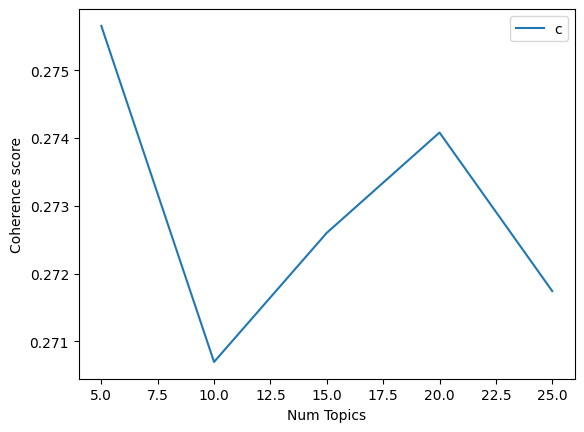

In [14]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=5, limit=30, step=5)
# Show graph
limit=30; start=5; step=5;
x = np.arange(start,limit, step )
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [15]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print(f"Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.2757
Num Topics = 10  has Coherence Value of 0.2707
Num Topics = 15  has Coherence Value of 0.2726
Num Topics = 20  has Coherence Value of 0.2741
Num Topics = 25  has Coherence Value of 0.2717


In [16]:
#finding the number of topics that gives the highest Coherence Value 
max_cv=max(coherence_values)
#finding the index of the model with this numnber of topics
index_model=coherence_values.index(max_cv)
#print(index_model)
# Select the model and print the topics 
optimal_model = model_list[index_model]
model_topics = optimal_model.show_topics(formatted=False)
#pprint(optimal_model.print_topics(num_words=10))

In [17]:
model_topics

[(0,
  [('ha', 0.010782582),
   ('nation', 0.010639026),
   ('state', 0.010315555),
   ('people', 0.008523662),
   ('united', 0.008434305),
   ('world', 0.007866737),
   ('peace', 0.0069483463),
   ('country', 0.0065407334),
   ('international', 0.006156234),
   ('organization', 0.0047804206)]),
 (1,
  [('ha', 0.015488423),
   ('united', 0.012942467),
   ('nation', 0.010661176),
   ('country', 0.00947084),
   ('people', 0.00943502),
   ('international', 0.008398961),
   ('world', 0.0071871486),
   ('state', 0.0068688793),
   ('organization', 0.0061246078),
   ('would', 0.005738984)]),
 (2,
  [('nation', 0.0196122),
   ('united', 0.012896341),
   ('country', 0.010794783),
   ('state', 0.0094147585),
   ('ha', 0.0094004115),
   ('international', 0.007752673),
   ('world', 0.0074355914),
   ('people', 0.006788632),
   ('peace', 0.0055066445),
   ('organization', 0.0047549857)]),
 (3,
  [('united', 0.015291694),
   ('nation', 0.013888026),
   ('country', 0.011676435),
   ('people', 0.01130

In [18]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus, dictionary)
vis

NameError: name 'pyLDAvis' is not defined

In [ ]:
s = np.random.dirichlet((10, 5, 3), 10)
#3 alpha => 3 theta is generated. so 3 topics in 1p documents.
s

array([[0.52857151, 0.28661584, 0.18481265],
       [0.63473088, 0.26530724, 0.09996188],
       [0.58212189, 0.21289029, 0.20498782],
       [0.67144655, 0.19927223, 0.12928123],
       [0.51884356, 0.26310845, 0.21804799],
       [0.44992998, 0.36537113, 0.1846989 ],
       [0.56659254, 0.28733464, 0.14607282],
       [0.58476342, 0.29985211, 0.11538448],
       [0.40822713, 0.3146813 , 0.27709157],
       [0.42143033, 0.35595985, 0.22260982]])

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(np.random.binomial(n=1, p=0.7, size=100), hist=True, kde=False)
plt.show()

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(loc=50, scale=5, size=1000), hist=False, label='normal')
sns.distplot(random.binomial(n=100, p=0.5, size=1000), hist=False, label='binomial')

plt.show()

In [ ]:
s= np.random.multinomial(1, [1/6,1/6,1/6,1/6,1/6,1/6], 10000)
s
# np.mean(s, axis=0)

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
n = 10
p = 0.5
s = np.random.binomial(n, p, 1000)
s

array([ 7,  7,  4,  4,  3,  1,  4,  5,  6,  6,  5,  5,  3,  4,  7,  6,  5,
        6,  4,  6,  4,  7,  4,  4,  4,  8,  4,  3,  4,  4,  5,  3,  5,  9,
        5,  6,  7,  6,  5,  3,  4,  3,  7,  4,  5,  5,  7,  4,  5,  6,  3,
        5,  6,  4,  7,  4,  3,  1,  4,  7,  5,  4,  3,  7,  5,  6,  4,  6,
        4,  4,  4,  7,  2,  7,  5,  4,  5,  6,  6,  8,  4,  6,  6,  4,  6,
        4,  3,  5,  6,  6,  3,  4,  7,  4,  6,  4,  7,  6,  7,  5,  7,  4,
        3,  8,  4,  5,  5,  5,  5,  3,  5,  3,  6,  7,  2,  5,  6,  4,  2,
        6,  0,  4,  4,  1,  6,  5,  4,  8,  4,  5,  6,  5,  6,  4,  3,  4,
        5,  7,  2,  6,  8,  5,  5,  7,  7,  3,  6,  3,  6,  5,  3,  5,  4,
        4,  5,  7,  7,  6,  7,  4,  4,  6,  4,  6,  5,  6,  4,  5,  2,  7,
        6,  4,  3,  4,  5,  4,  3,  4,  5,  3,  5,  8,  7,  4,  4,  5,  9,
        5,  5, 10,  4,  4,  5,  7,  5,  5,  6,  5,  5,  6,  5,  6,  6,  4,
        4,  3,  5,  3,  7,  6,  5,  3,  4,  5,  6,  4,  6,  4,  7,  1,  5,
        4,  4,  7,  5,  6

In [ ]:
n = 2000000
np.random.multinomial(n, [0.17, ], size=10)

array([[2000000],
       [2000000],
       [2000000],
       [2000000],
       [2000000],
       [2000000],
       [2000000],
       [2000000],
       [2000000],
       [2000000]])

In [ ]:
[1/6]*6

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]